# Dataviz and -analysis of Premier League GK stat 

In [1]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


## 1. Data preparation

Load in our data

In [2]:
#normal stats including save%, clean sheets and penalty saves
df_stats = pd.read_csv("../data/epl_gk_stats.csv", index_col="Rk")

#advanced stats including crosses, goal kicks and passes
df_adv_stats = pd.read_csv("../data/epl_gk_adv_stats.csv", index_col="Rk")

General information about dataset

In [4]:
#general information about our data set
df_adv_stats.head()

,Player,Nation,Pos,Squad,Age,Born,90s,GA,PKA,FK,...,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Adrián\Adrian,es ESP,GK,Liverpool,32,1987,9.7,10,0,1,...,68,48.5,40.4,91,8,8.8,7,0.72,13.3,Matches
2,Alisson\Alisson,br BRA,GK,Liverpool,26,1992,28.3,23,1,0,...,170,39.4,38.8,197,16,8.1,37,1.31,17.5,Matches
3,Kepa Arrizabalaga\Kepa-Arrizabalaga,es ESP,GK,Chelsea,24,1994,33.0,47,2,2,...,199,42.2,39.1,236,17,7.2,21,0.64,16.0,Matches
4,Claudio Bravo\Claudio-Bravo,cl CHI,GK,Manchester City,36,1983,3.9,7,0,0,...,28,64.3,48.2,35,3,8.6,1,0.26,12.4,Matches
5,Willy Caballero\Willy-Caballero,ar ARG,GK,Chelsea,37,1981,5.0,7,0,0,...,28,42.9,36.8,20,0,0.0,2,0.40,12.8,Matches


### 1.1. Cleaning dataset

Fill empty cells

In [5]:
df_stats.isnull().sum()
df_stats.fillna(0.5, inplace=True)

Remove GK's with less than 600 minutes played

In [6]:
df_stats = df_stats.drop(df_stats[df_stats["Min"] < 600].index)

df_adv_stats = df_adv_stats.drop(df_adv_stats[df_adv_stats["90s"] < 7].index)

Remove double Player name

In [7]:
#clean player names
df_stats["Player"] = [name.split("\\")[0] for name in df_stats["Player"]]
df_adv_stats["Player"] = [name.split("\\")[0] for name in df_adv_stats["Player"]]

### 1.2. Calculating metrics

In [8]:
#saves per match
df_stats["Sv/90"] = df_stats["Saves"] / (df_stats["Min"]/90)

#saves per goal
df_stats["Sv/GA"] = df_stats["Saves"] / df_stats["GA"]

## 2. Data analysis

## GSAA and GSAE

#### GSAA

Calculate GSAA (Goals Saved Above Average)

In [9]:
#GSAA
#first we calculate how many saves an average GK would have saved if he faced the same amount of shots as our GK
df_stats["SvavgSv%"] = (df_stats["Save%"].mean()*df_stats["SoTA"])
#with SvavgSv% we can then calculate how many goals our team/GK would have let in if our GK performed as an average GK
df_stats["GAavgSv%"] = df_stats["SoTA"] - df_stats["SvavgSv%"]
#with GAavgSv% we can calculate how many more or less goals our GK have saved, that an average GK wouldn¨t had saved
df_stats["GSAA"] = df_stats["GAavgSv%"] - df_stats["GA"]

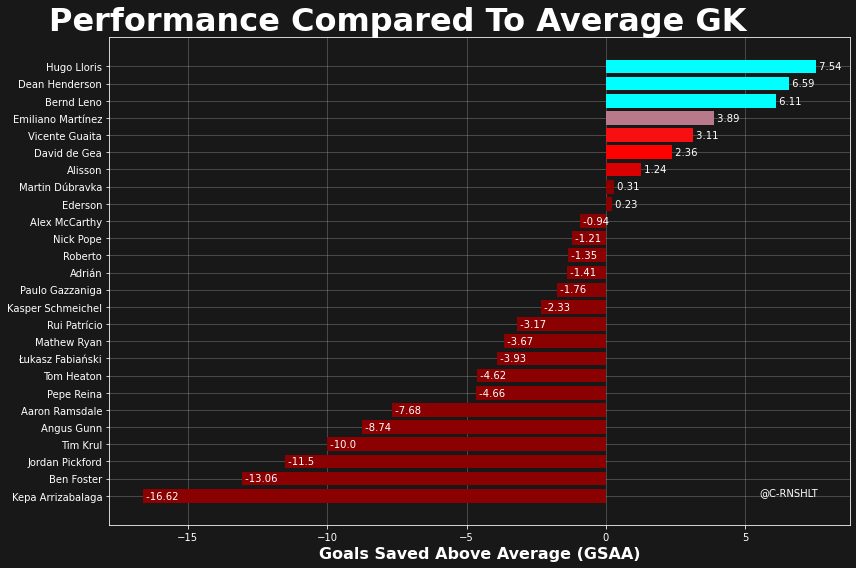

In [11]:
#sort 1st plot
x = df_stats.sort_values("GSAA")["Player"]
y = df_stats.sort_values("GSAA")["GSAA"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 6 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#181818")
ax.set_facecolor("#181818")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("Goals Saved Above Average (GSAA)",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Performance Compared To Average GK", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("../output/EPL_GSAA_barh.png", dpi=300,facecolor="#181818");

#### GSAE (oTxG - GA)
Goals Saved Above Expectation is a very good indication of how many goals the goalkeeper has conceded compared to how much the Expected Goals against the goalkeeper said he "should" have conceded.
Jose Perez for inspiration

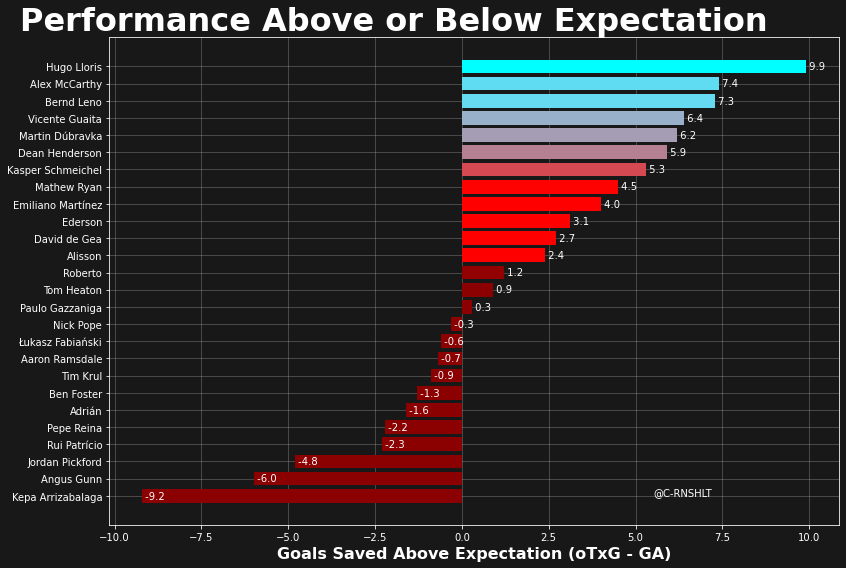

In [12]:
#sort 1st plot
x = df_adv_stats.sort_values("PSxG+/-")["Player"]
y = df_adv_stats.sort_values("PSxG+/-")["PSxG+/-"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 9 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#181818")
ax.set_facecolor("#181818")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("Goals Saved Above Expectation (oTxG - GA)",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("Performance Above or Below Expectation", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y):
    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("../output/EPL_GSAE_barh.png", dpi=300,facecolor="#181818");

This means that Hugo Lloris have saved 10 goals that Spurs should have conceded and Kepa has conceded almost 10 more goals than Chelsea was expected to do.

## Claims (cross and outside PA actions) 

**Add basic barplot for claims metrics**

findfont: Font family ['Corbel'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Corbel'] not found. Falling back to DejaVu Sans.


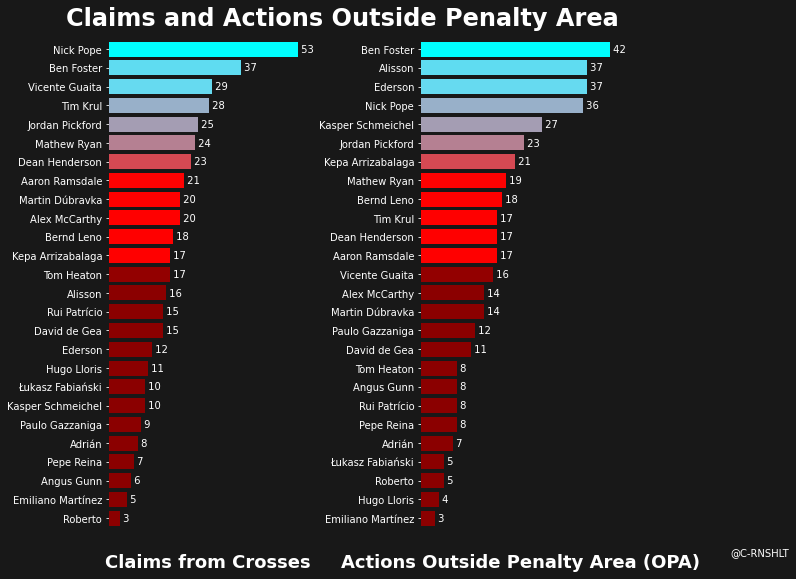

In [13]:
#sort 1st plot
x1 = df_adv_stats.sort_values("Stp")["Player"]
y1 = df_adv_stats.sort_values("Stp")["Stp"]

#sort 2nd plot
x2 = df_adv_stats.sort_values("#OPA")["Player"]
y2 = df_adv_stats.sort_values("#OPA")["#OPA"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N1 = 8 #highest value on x-axis (ax1) 
N2 = 45 #highest value on x-axis (ax2)

#create plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()

#plot 1st subplot
ax1.barh(x1, y1, color=rvb(y/N), zorder=3)

#plot 2nd subplot
ax2.barh(x2, y2,color=rvb(y/N), zorder=3)

#set background colour
fig.set_facecolor("#181818")

#add title text
fig.suptitle("Claims and Actions Outside Penalty Area", 
             x=0.40, y=1, fontsize=24, fontname="Corbel", color="white", fontweight="bold")
ax1.set_xlabel("Claims from Crosses",
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")
ax2.set_xlabel("Actions Outside Penalty Area (OPA)", 
               fontsize=18, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
for i, value in enumerate(y1):
    ax1.text(value, i, " "+str(round(value, 2)), color="white", va="center")
for i, value in enumerate(y2):
    ax2.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines and xticks
ax1.set_frame_on(False)
ax1.tick_params(axis="y", colors="white")
ax1.set_xticks([])

ax2.set_frame_on(False)
ax2.tick_params(axis="y", colors="white")
ax2.set_xticks([])

#add signature
ax2.text(xmax+68, ymin-2, "@C-RNSHLT", color="white")

plt.tight_layout()

plt.savefig("../output/EPL_crosses_OPA.png", dpi=300, facecolor="#181818");

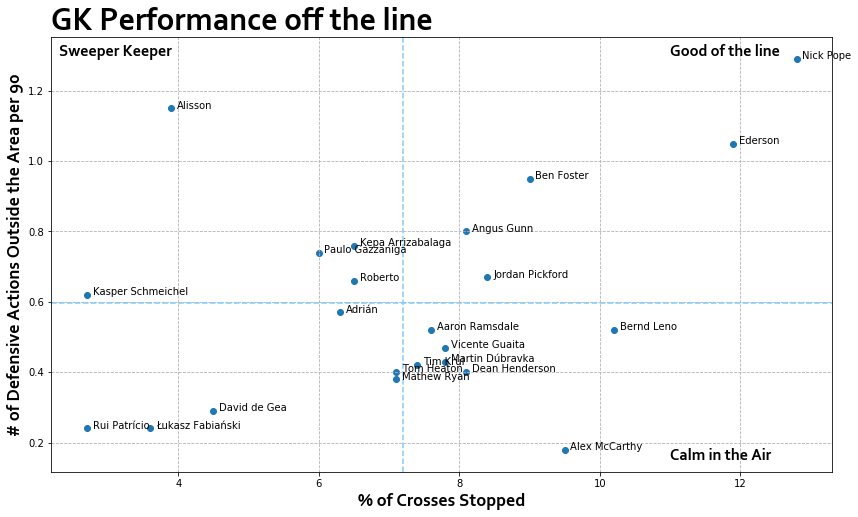

In [9]:
#plot save% vs CS%
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(df_adv_stats["Stp%"], df_adv_stats["#OPA/90"])

#add mean lines
ax.axvline(df_adv_stats["Stp%"].mean(), linestyle='--', color="#82cafc")
ax.axhline(df_adv_stats["#OPA/90"].mean(), linestyle='--', color="#82cafc")

#adding text
ax.set_xlabel("% of Crosses Stopped", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_ylabel("# of Defensive Actions Outside the Area per 90", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_title("GK Performance off the line", fontsize=32, loc="left", fontname="Corbel", fontweight="bold")

#add text/grid inside plot
ax.text(2.3, 1.3, "Sweeper Keeper", fontsize=16, fontname="Corbel", fontweight="bold")
ax.text(11, 0.15, "Calm in the Air", fontsize=16, fontname="Corbel", fontweight="bold")
ax.text(11, 1.3, "Good of the line", fontsize=16, fontname="Corbel", fontweight="bold")
ax.grid(linestyle="--")

#Create labels for each GK
for i, txt in enumerate(df_stats["Player"]):
    #uneccesary in this case, but can sort out GK with low save% (thus highliht good performers)
    #if df_stats["Save%"].iloc[i] > 0.5:
    ax.annotate(txt, xy = (df_adv_stats["Stp%"].iloc[i]+0.08, df_adv_stats["#OPA/90"].iloc[i])) 
                #txt is the text added, xy is coordinates of location


### 2.3. Distribution